# Datan analysointi K2020_2 - Tehtävät kerta 6

Palauta Optiman palautuslaatikkoon viimeistään su 29.3. Kirjoita palautuslaatikon kommenttikenttään, mitkä tehtävät olet tehnyt kokonaan/osittain.

Opiskelijan nimi: Jere Pesonen M3227

## 1. Sekunnit aikaleimoiksi
Tiedostossa http://student.labranet.jamk.fi/~varpe/datananal2k2020/kerta6/gps.txt on gps-koordinaatteja ja niille aikaleimoja:

**t401.444483900_1490796_6272051_S36.**

  * **t401** = laitteen id (merkkijono)
  * **444483900** = UTC-aika sekunteina vuoden 2006 alusta eli 1.1.2006 00:00:00 (kokonaislukuna)
  * **1490796** = pituusaste*50000 (kokonaislukuna)
  * **6272051** = leveysaste*100000 (kokonaislukuna)
  * **S36** = nopeus (km/h) * 10 (kokonaislukuna)
  
laiteid:n jälkeen siis on aina piste ja muissa väleissä alaviiva. Nopeuslukeman edessä on aina kirjain S ja rivin lopussa piste.

Pura tiedosto DataFrameen, jossa on sarakkeet
  * laitteen id
  * aikaleima Timestampina Suomen aikaa joka on tuolloin ollut 2 tuntia edessä UTC-aikaa
  * pituusaste asteina
  * leveysaste asteina
  * nopeus km/h
  
Mallia alusta:
![malli1](http://student.labranet.jamk.fi/~varpe/datananal2k2020/kerta6/malli1.png)

In [4]:
import pandas as pd
from datetime import datetime
from datetime import timedelta

df = pd.read_csv("http://student.labranet.jamk.fi/~varpe/datananal2k2020/kerta6/gps.txt",
                names=["alku", "id", "aika", "pituusaste", "leveysaste", "nopeus"])
df['nopeus'] = df['alku'].str[-3:].str.split('.').str.get(0)
df['nopeus'] = df['nopeus'].replace('S0',0)
df['nopeus'] = df['nopeus'].astype(float) / 10
df['leveysaste'] = df['alku'].str.split('_').str.get(2).str.split('_').str.get(0).astype(float) / 100000
df['pituusaste'] = df['alku'].str.split('_').str.get(1).str.split('_').str.get(0).astype(float) / 50000

silloin = datetime(2006,1,1,2,0,0)
df['id'] = df['alku'].str[:4]
df['aika'] = df['alku'].str.split('.').str.get(1).str.split('_').str.get(0).astype(int)
df['aika'] = silloin + pd.to_timedelta(df['aika'], unit='s')

df = df.drop('alku', 1)

df.head(10)

,id,aika,pituusaste,leveysaste,nopeus
0,t401,2020-02-01 13:45:00,29.81592,62.72051,3.6
1,t401,2020-02-01 13:45:02,29.81584,62.72052,7.6
2,t401,2020-02-01 13:45:04,29.81580,62.72054,5.4
3,t401,2020-02-01 13:45:06,29.81580,62.72054,0.0
4,t401,2020-02-01 13:45:08,29.81580,62.72054,0.0
5,t401,2020-02-01 13:45:10,29.81582,62.72053,2.7
6,t401,2020-02-01 13:45:12,29.81582,62.72053,0.0
7,t401,2020-02-01 13:45:14,29.81582,62.72053,0.0
8,t401,2020-02-01 13:45:16,29.81582,62.72053,0.0
9,t401,2020-02-01 13:45:18,29.81582,62.72053,0.0


## 2. Jalkapalloa

Lue tiedosto http://student.labranet.jamk.fi/~varpe/datananal2k2020/kerta6/epl20200309.txt , jossa on Valioliigan ottelut kaudesta 1993-1994 tammikuuhun 2020 DataFrameen.

Listaa ensin minä kalenterikuukausina on pelattu eniten otteluita.  
Pitäisi tulla:
```
2017-12    69
2018-12    69
1994-04    68
2001-12    65
2013-12    64
1994-12    64
2006-12    64
```


Selvitä sitten minä **kalenteriviikkoina (ma-su)** on pelattu eniten otteluita.
Yritä saada otsikoitua viikot alkamispäivän mukaan, jolloin tulokseksi pitäisi saada:  
```
1994-12-26    31  
2005-12-26    27  
1993-12-27    27  
1993-08-16    22  
1993-08-23    22  
```
(huomioi että vuodenvaihteessa saman kalenteriviikon päivät ovat usein eri vuosina)

Laske vielä kuinka paljon otteluita on pelattu eri viikonpäivinä:  
```
ma     680
ti     505
ke     912
to      79
pe      99
la    6104
su    1953
```

In [5]:
df = pd.read_csv("http://student.labranet.jamk.fi/~varpe/datananal2k2020/kerta6/epl20200309.txt", sep=";")
df2 = df
df['Date'] = pd.to_datetime(df['Date'])
df['Vuosikk'] = pd.to_datetime(df['Date']).dt.to_period('M')
print("Matches in one month")
print(df['Vuosikk'].value_counts().head(10))
print("\n")

#print(df['Date'].apply(lambda x:x.to_period(freq = 'w')).value_counts().head(10))
df2 = df2.resample('W', on ='Date', kind = 'period').count()
print("Matches in one week")
print(df2['Date'].sort_values(ascending=False).head(10))
print("\n")

df3 = df.groupby(df['Date'].dt.day_name()).count()
df3 = df3.drop(columns='Date')
df3 = df3.reset_index()
cats = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df3 = df3.set_index('Date').reindex(cats).reset_index()
df3 = df3.rename(columns={"season": "Games"})
print("Matches per day of a week")
print(df3[['Date', 'Games']].head(10))

Matches in one month
2018-12    69
2017-12    69
1994-04    68
2001-12    65
2013-12    64
2006-12    64
1994-12    64
2019-12    63
2007-12    61
2014-12    60
Freq: M, Name: Vuosikk, dtype: int64


Matches in one week
Date
1994-12-26/1995-01-01    31
1993-12-27/1994-01-02    27
2005-12-26/2006-01-01    27
1993-08-16/1993-08-22    22
1993-08-23/1993-08-29    22
2010-12-27/2011-01-02    21
2002-12-23/2002-12-29    21
1994-08-22/1994-08-28    21
2013-12-23/2013-12-29    21
2003-12-22/2003-12-28    20
Freq: W-SUN, Name: Date, dtype: int64


Matches per day of a week
        Date  Games
0     Monday    680
1    Tuesday    505
2  Wednesday    912
3   Thursday     79
4     Friday     99
5   Saturday   6104
6     Sunday   1953


# 3. Liigavire
Tiedostossa http://student.labranet.jamk.fi/~varpe/datananal1k2020/kerta6/liiga.txt on SM-liigan (nyk. Liiga) runkosarjan ottelutukset kaudesta 2010-2011 kauden 2019-2020 maaliskuun alkuun.

huom. -sarakkeessa on merkintä JA tai VL, jos ottelu on ratkennut vasta jatkoajalla tai voittomaalikilpailussa.

Voittanut (enemmän maaleja tehnyt joukkue) saa 3 pistettä ja hävinnyt 0 pistettä, paitsi jos ottelu on ratkennut vasta jatkoajalla tai voittomaalikilpailussa, voittanut joukkue saa 2 pistettä ja hävinnyt yhden pisteen.


Laske jokaisen JYP:n ottelun kohdalle paljonko JYP on saanut pisteitä edellisestä 15 ottelustaan ja piirrä näistä tiedoista piste-viivakaavio, jossa vaaka-akselilla on ottelun päiväys.

(kaavioon tulee siis n. 6 kk katkoja kausien välillä koska runkosarjaotteluia ei pelata huhti-elokuussa)

Malli:
![malli3](http://student.labranet.jamk.fi/~varpe/datananal2k2020/kerta6/malli3.png)

            JYP
pvm            
2010-09-16  1.0
2010-09-17  3.0
2010-09-21  3.0
2010-09-23  3.0
2010-09-28  3.0
2010-09-30  0.0
2010-10-02  3.0
2010-10-05  3.0
2010-10-07  3.0
2010-10-09  0.0
2010-10-13  2.0
2010-10-16  3.0
2010-10-19  3.0
2010-10-21  3.0
2010-10-23  3.0
2010-10-26  3.0
2010-10-29  3.0
2010-10-30  3.0
2010-11-04  3.0
2010-11-06  3.0
2010-11-16  1.0
2010-11-18  3.0
2010-11-19  3.0
2010-11-21  3.0
2010-11-23  0.0
2010-11-26  3.0
2010-11-27  3.0
2010-11-30  0.0
2010-12-03  3.0
2010-12-04  0.0
2010-12-09  3.0
2010-12-11  0.0
2010-12-28  3.0
2010-12-30  3.0
2011-01-04  0.0
2011-01-06  3.0
2011-01-07  3.0
2011-01-11  3.0
2011-01-13  3.0
2011-01-15  1.0
2011-01-18  3.0
2011-01-20  0.0
2011-01-22  3.0
2011-01-25  3.0
2011-01-28  3.0
2011-01-29  0.0
2011-02-01  0.0
2011-02-03  1.0
2011-02-05  2.0
2011-02-15  3.0


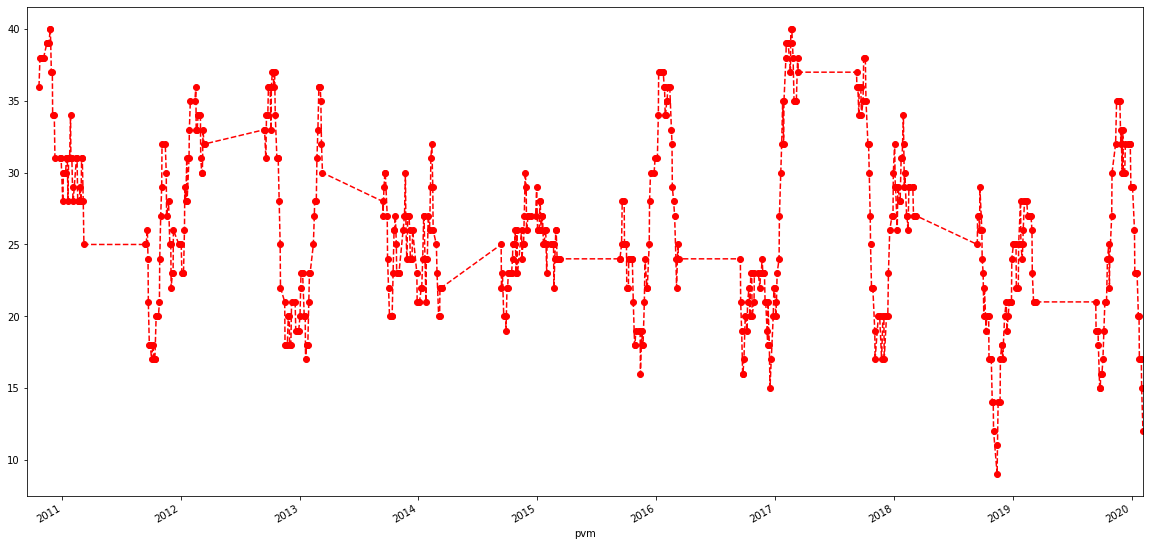

In [48]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
df = pd.read_csv("http://student.labranet.jamk.fi/~varpe/datananal1k2020/kerta6/liiga.txt", parse_dates=['pvm'], dayfirst=True)
df = df.fillna(0)
df2 = pd.DataFrame()
df2['pvm'] = df['pvm']
df['kotij'] = df['ottelu'].str.split('-').str.get(0).str.strip()
df['vierasj'] = df['ottelu'].str.split('-').str.get(1).str.strip() 
df['kotim'] = df['tulos'].str.split('-').str.get(0).astype(int)
df['vierasm'] = df['tulos'].str.split('-').str.get(1).astype(int)
df.loc[(df['kotij'] == 'JYP') & (df['kotim'] > df['vierasm']) & (df['huom'] == 0), 'JYP'] = 3
df.loc[(df['kotij'] == 'JYP') & (df['kotim'] > df['vierasm']) & (df['huom'] != 0 ), 'JYP'] = 2
df.loc[(df['kotij'] == 'JYP') & (df['kotim'] < df['vierasm']) & (df['huom'] != 0 ), 'JYP'] = 1

df.loc[(df['vierasj'] == 'JYP') & (df['kotim'] < df['vierasm']) & (df['huom'] == 0 ), 'JYP'] = 3
df.loc[(df['vierasj'] == 'JYP') & (df['kotim'] < df['vierasm']) & (df['huom'] != 0 ), 'JYP'] = 2
df.loc[(df['vierasj'] == 'JYP') & (df['kotim'] > df['vierasm']) & (df['huom'] != 0 ), 'JYP'] = 1

df.loc[(df['vierasj'] == 'JYP') & (df['kotim'] > df['vierasm']) & (df['huom'] == 0 ), 'JYP'] = 0
df.loc[(df['kotij'] == 'JYP') & (df['kotim'] < df['vierasm']) & (df['huom'] == 0 ), 'JYP'] = 0
df2['JYP'] = df['JYP']
df2 = df2.set_index('pvm')
df2 = df2.dropna()
print(df2.head(50))

fig, ax = plt.subplots(figsize=(20, 10))
df2['JYP'].rolling(15).sum().plot(style=['ro--'])
plt.show()



## 4. Kilometrit

Tiedostossa http://student.labranet.jamk.fi/~varpe/datananal2k2020/kerta6/km.txt  on erään kuntoilijan päivittäisiä kilometrimääriä kesiltä 2015-2019.

Lue tiedosto ja laske jokaiselle päivälle toukokuun alusta lokakuun loppuun kuinka paljon enemmän tai vähemmän vuonna 2019 on kertynyt kilometreja kesän alusta verrattuna vuosiin 2015... 2018. Piirrä samaan kaavioon ero jokaiseen aikaisempaan vuoteen.

(huomaa että kilometrejä ei ole kertynyt läheskään jokainen päivä, mutta joka päivälle pitäisi saada ero laskettua)

Malli:
![malli4](http://student.labranet.jamk.fi/~varpe/datananal2k2020/kerta6/malli4.png)

   DayofYear  ero2018  ero2017  ero2016  ero2015
0          1      0.0      0.0      0.0      0.0
1          2      0.0      0.0      0.0      0.0
2          3      0.0      0.0      0.0      0.0
3          4      0.0      0.0      0.0      0.0
4          5      0.0      0.0      0.0      0.0


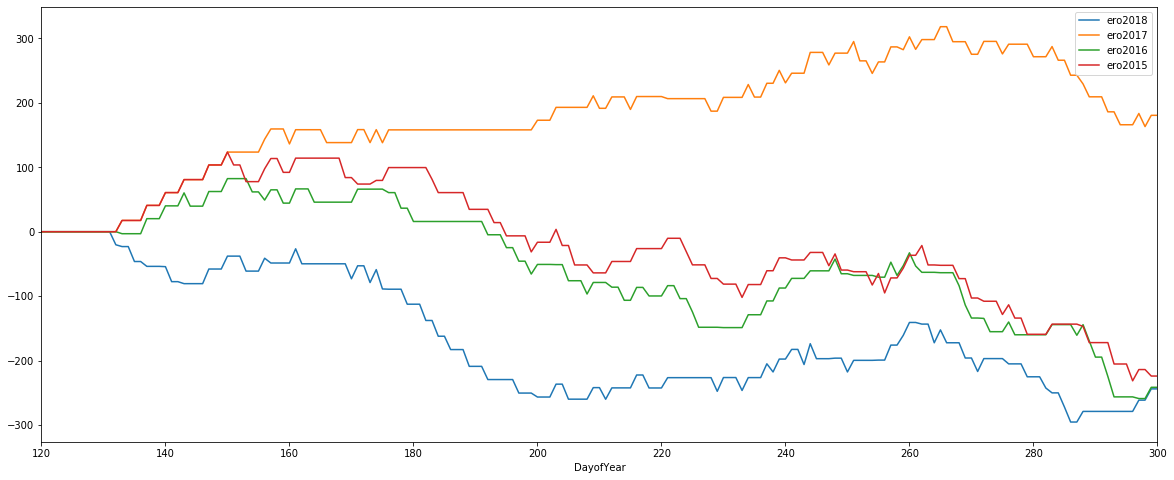

In [350]:
df = pd.read_csv("http://student.labranet.jamk.fi/~varpe/datananal2k2020/kerta6/km.txt", parse_dates=['pvm'], dayfirst=True)
from functools import reduce
import numpy as np
df['DayofYear']=df['pvm'].dt.dayofyear.astype(int)
df2 = pd.DataFrame(columns=['DayofYear'])
a = np.arange(1, 366)
df2['DayofYear'] = a
df2019 = df[df['pvm'].dt.year == 2019]
df2018 = df[df['pvm'].dt.year == 2018]
df2017 = df[df['pvm'].dt.year == 2017]
df2016 = df[df['pvm'].dt.year == 2016]
df2015 = df[df['pvm'].dt.year == 2015]

df2 = pd.merge(df2, df2019, on='DayofYear', how = 'left', suffixes=('','_19'))
df2 = pd.merge(df2, df2018, on='DayofYear', how = 'left', suffixes=('','_18'))
df2 = pd.merge(df2, df2017, on='DayofYear', how = 'left', suffixes=('','_17'))
df2 = pd.merge(df2, df2016, on='DayofYear', how = 'left', suffixes=('','_16'))
df2 = pd.merge(df2, df2015, on='DayofYear', how = 'left', suffixes=('','_15'))


df3 = pd.DataFrame()
df2=df2.fillna(0)
#print(df2.head(10))
df3['DayofYear'] = df2['DayofYear']
df3['ero2018'] = df2['km'].cumsum() - df2['km_18'].cumsum()
df3['ero2017'] = df2['km'].cumsum() - df2['km_17'].cumsum()
df3['ero2016'] = df2['km'].cumsum() - df2['km_16'].cumsum()
df3['ero2015'] = df2['km'].cumsum() - df2['km_15'].cumsum()
print(df3.head())

df3.plot('DayofYear',['ero2018', 'ero2017', 'ero2016', 'ero2015'], figsize=(20,8))
plt.yticks(np.arange(-300, 400, step=100))
plt.xlim(120, 300)
plt.show()


## 5. access.log
Tiedostossa http://student.labranet.jamk.fi/~varpe/datananal2k2020/kerta6/accesslog.zip on eräästä access.log-tiedostosta poimittuja tietoja (ip-osoite, aika ja eventid).

Tee tiedoista kaavio, joka kertoo kuinka monta **eri ip-osoitetta** on ollut kussakin kuudessa eventissä 5 minuutin jaksoissa näytteistettynä (eli esim montako eri ip-osoitetta on välillä 11:30:00-11:34:59).

Voit joutua käyttämään omaa date_parser-funktiota. 

Malli:  
![malli5](http://student.labranet.jamk.fi/~varpe/datananal2k2020/kerta6/malli5.png)

            timestamp  20180508_MQ_MA  20180508_MQ_MB  20180508_MQ_MC  \
0 2018-05-08 10:55:00              20               5               6   
1 2018-05-08 11:00:00              54              23              16   
2 2018-05-08 11:05:00             105              59              49   
3 2018-05-08 11:10:00             149              93              83   
4 2018-05-08 11:15:00             165             114             100   
5 2018-05-08 11:20:00             189             125             109   
6 2018-05-08 11:25:00             191             136             134   
7 2018-05-08 11:30:00             207             147             134   
8 2018-05-08 11:35:00             204             159             133   
9 2018-05-08 11:40:00             216             173             141   

   20180508_MQ_WA  20180508_MQ_WB  20180508_MQ_WC  
0              59              11               7  
1              97              25              16  
2             164              54       

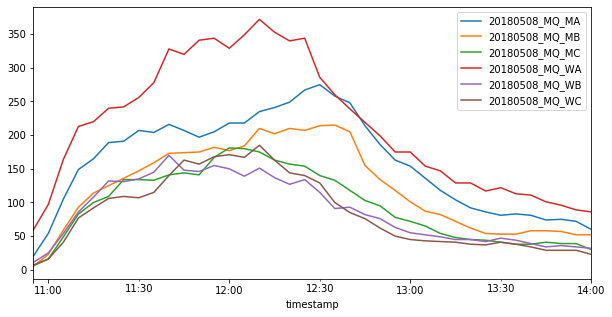

In [69]:
df = pd.read_csv("http://student.labranet.jamk.fi/~varpe/datananal2k2020/kerta6/accesslog.zip")
df['timestamp'] = pd.to_datetime(df['timestamp'], format='%d/%B/%Y:%H:%M:%S')
dfA = df.loc[df['eventid'] == '20180508_MQ_MA']
dfA2 = pd.DataFrame(dfA.resample('5min', on='timestamp')['ip'].nunique()).reset_index()

dfA = df.loc[df['eventid'] == '20180508_MQ_MA']
dftotal = pd.DataFrame(dfA.resample('5min', on='timestamp')['ip'].nunique()).reset_index()

dfB = df.loc[df['eventid'] == '20180508_MQ_MB']
dfB2 = pd.DataFrame(dfB.resample('5min', on='timestamp')['ip'].nunique()).reset_index()

dfC = df.loc[df['eventid'] == '20180508_MQ_MC']
dfC2 = pd.DataFrame(dfC.resample('5min', on='timestamp')['ip'].nunique()).reset_index()

dfWA = df.loc[df['eventid'] == '20180508_MQ_WA']
dfWA2 = pd.DataFrame(dfWA.resample('5min', on='timestamp')['ip'].nunique()).reset_index()

dfWB = df.loc[df['eventid'] == '20180508_MQ_WB']
dfWB2 = pd.DataFrame(dfWB.resample('5min', on='timestamp')['ip'].nunique()).reset_index()

dfWC = df.loc[df['eventid'] == '20180508_MQ_WC']
dfWC2 = pd.DataFrame(dfWC.resample('5min', on='timestamp')['ip'].nunique()).reset_index()

dftotal = dftotal.rename(columns={"ip": "20180508_MQ_MA"})
dftotal['20180508_MQ_MB'] = dfB2['ip']
dftotal['20180508_MQ_MC'] = dfC2['ip']
dftotal['20180508_MQ_WA'] = dfWA2['ip']
dftotal['20180508_MQ_WB'] = dfWB2['ip']
dftotal['20180508_MQ_WC'] = dfWC2['ip']

dftotal.plot('timestamp',['20180508_MQ_MA', '20180508_MQ_MB', '20180508_MQ_MC', '20180508_MQ_WA', '20180508_MQ_WB', '20180508_MQ_WC'], figsize=(10,5))
print(dftotal.head(10))